In [68]:
#http://codewithmax.com/?s=Machine+Learning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  #https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
from sklearn.preprocessing import Normalizer
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import preprocessing


from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split # https://www.youtube.com/watch?v=fwY9Qv96DJY
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures #https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

from numpy import array
from sklearn.model_selection import KFold  #https://machinelearningmastery.com/k-fold-cross-validation/

#loops tut # https://treyhunner.com/2016/04/how-to-loop-with-indexes-in-python/
# data cleaning # https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
#Data normalizing #https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/
# https://medium.com/@kamskijohnm2m/ames-housing-price-prediction-complete-ml-project-with-python-2af595a749d6

In [2]:
CompleteSet = pd.read_csv('house_data_complete.csv') # 21,613


In [3]:
houses = pd.read_csv('house_data_complete.csv') # 21,613
train = pd.read_csv('house_prices_data_training_data.csv') # 17,999 

In [4]:
CrossValid = houses.iloc[18000:19453,:]
Test = houses.iloc[19454:-1,:]

houses.shape #(21613, 19)
#train.shape #(17999, 19)
#CrossValid #(1453, 19)
Test.shape #(2158, 19)

# ???????????????????????????????????????????????????????????? There is a missing rows from the data set

(2158, 21)

In [5]:
houses.shape # (21613, 19)
#train.shape # (17999, 19)

(21613, 21)

In [6]:
# houses.head, it shows the first top 5 rows of data
# houses.tail, it shows the first last 5 rows of data
del houses['id']
del houses['date']

del train['id']
del train['date']
houses.head(4)                                                 # it shows the first top n rows of data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [7]:
houses.dtypes                                                        #data types
statistics = houses.describe()                                  #returns basic statistics for the data
statistics

#data['Item Code'].astype(str) ,                                       To change the datatype of a specific column

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Creat a dateframe from a list as an input
# list of strings
#lst = ['Geeks', 'For', 'Geeks', 'is', 
#            'portal', 'for', 'Geeks']
 
# Calling DataFrame constructor on list
#df = pd.DataFrame(lst)



# to print a certain column
# houses.price 
# houses['price'] 
# houses[ ['price','id'] ]                                                  #get two columns
# houses.iloc[0:20,:]                                                #select certain columns

#np.array_equal(CrossValid.price,houses.price)                               #compare if the two array are equal
#----------------------------------
# Replacing the missing value 
#houses.fillna(new_value)

#houses.corr()                                      # measure the correlation with all the variables in the data set

#houses.dropna()                                     #drop the rows that contains any unknown values

#print(train.isnull().sum())                          # see how may nulls in each column of the data

out = houses.isnull()                                  #check if there empty cells or nulls, it returns array of boolean
#[i for i, x in enumerate(out) if True]                   #loop to search if there is any True (empty) values

houses.shape


# Calculate and show correlation matrix # https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d


(21613, 19)

Text(0, 0.5, 'price')

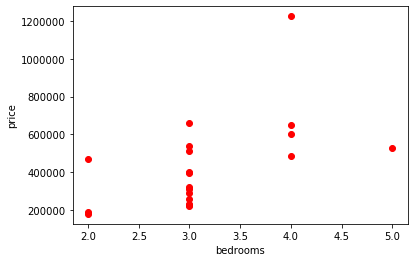

In [9]:
bedrooms = houses.bedrooms[0:20]
price = houses.price[0:20]
plt.plot(bedrooms,price,'ro')
plt.xlabel('bedrooms')
plt.ylabel('price')

Text(0, 0.5, 'price')

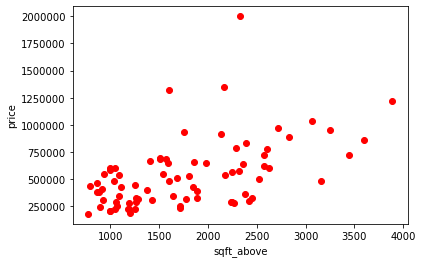

In [10]:
sqft_above = houses.sqft_above[0:80]
price = houses.price[0:80]
plt.plot(sqft_above,price,'ro')
plt.xlabel('sqft_above')
plt.ylabel('price')

Text(0, 0.5, 'bedrooms')

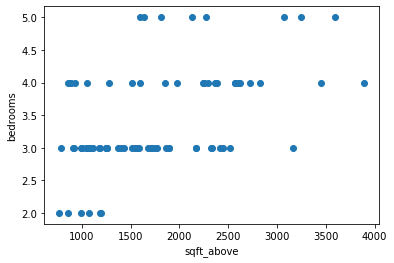

In [11]:
sqft_above = houses.sqft_above[0:80]
bedrooms = houses.bedrooms[0:80]
plt.scatter(sqft_above,bedrooms)
plt.xlabel('sqft_above')
plt.ylabel('bedrooms')

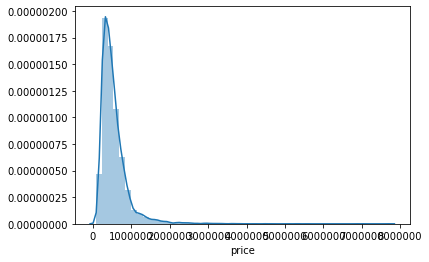

In [12]:
sns.distplot(houses.price) # distribution of price
plt.show()

In [13]:
#normalize the data  # redivide the complete data after normalization !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1
houses.price.mean()
houses.price.std()


367127.19648269983

In [14]:
houses.price.head()
meanP = houses.price.mean()
stdP = houses.price.std()
(houses.price - meanP)/stdP

0       -0.866697
1       -0.005688
2       -0.980827
3        0.174086
4       -0.081956
           ...   
21608   -0.490533
21609   -0.381579
21610   -0.375856
21611   -0.381579
21612   -0.585868
Name: price, Length: 21613, dtype: float64

In [15]:
len(houses)
houses.columns
len(houses.columns)


19

In [16]:
#normalize the data ------------------------------------ Method 1 (-1,1) -----------------------------------------------
#len(houses)
for i in range(len(houses.columns)):
    t = houses.iloc[:,i]
    meanP = t.mean()
    stdP = t.std()
    houses.iloc[:,i] = (t-meanP)/stdP
    
for j in range(len(train.columns)):
    t = train.iloc[:,j]
    meanP = t.mean()
    stdP = t.std()
    train.iloc[:,j] = (t-meanP)/stdP    
    
houses    

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866697,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.352564,-0.306072,-0.943333,-0.260709
1,-0.005688,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,0.460830,0.245136,-0.681063,4.746568,0.879547,1.161541,-0.746324,-0.432676,-0.187863
2,-0.980827,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,-0.629172,-1.409554,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.283507,-0.135652,1.070115,-0.172371
3,0.174086,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,2.444237,-0.558823,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.283281,-1.271787,-0.914153,-0.284515
4,-0.081956,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,-0.629172,0.291909,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,0.409541,1.199307,-0.272184,-0.192844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490533,-0.398728,0.500209,-0.598732,-0.337417,2.788374,-0.087171,-0.305752,-0.629172,0.291909,-0.312032,-0.658666,1.293512,-0.210124,0.468371,1.004935,-0.938047,-0.666119,-0.412371
21609,-0.381579,0.676469,0.500209,0.250534,-0.224381,0.936484,-0.087171,-0.305752,-0.629172,0.291909,0.629894,-0.658666,1.463734,-0.210124,1.272034,-0.356172,-1.051660,-0.228413,-0.203942
21610,-0.375856,-1.473925,-1.772037,-1.154021,-0.332129,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,-0.927906,-0.658666,1.293512,-0.210124,1.234654,0.247882,-0.604307,-1.410220,-0.394132
21611,-0.381579,-0.398728,0.500209,-0.522516,-0.307069,0.936484,-0.087171,-0.305752,-0.629172,0.291909,-0.227500,-0.658666,1.123290,-0.210124,-0.952056,-0.184410,1.028887,-0.841202,-0.420502


In [17]:
CrossValid = houses.iloc[18000:19453,:] # (1453, 19)
Test = houses.iloc[19454:-1,:] # (2158, 19)

In [18]:
temp = pd.read_csv('house_data_complete.csv')

In [19]:
temp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
del temp['id']
del temp['date']

In [21]:
# Normalize data temp == houses ----------------------------------- Method 2(0,1) --------------------------------------------
trial = temp.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(trial)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


In [22]:
Y_train = temp.price[0:17999]    # temp is the complete set of houses without normalization
Y_CV = temp.price[18000:19453]
Y_Test = temp.price[19454:-1]
Y_train.shape


(17999,)

In [23]:
df.columns = ['price' ,'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df.head(3) # rename the columns of the dataframe wich is the temp # normalized houses with method 2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513


In [24]:
#-----------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------
# Y_train, Y_CV, Y_Test 
del train['price']
del CrossValid['price']
del Test['price']

# using the 2nd normalization way for analysis
df_train = df.iloc[0:17999,:] # (1453, 19)
df_CrossValid = df.iloc[18000:19453,:] # (1453, 19)
df_Test = df.iloc[19454:-1,:] # (2158, 19)

del df_train['price']
del df_CrossValid['price']
del df_Test['price']


In [25]:
CrossValid
df_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513


In [27]:
def computeCostMulti(X, y, theta, lambda_):
    
    J = 0
    grad = np.zeros(theta.shape)
    m = y.shape[0]   
                                                                         #transform the dataframe to 2d array
                                                                          #no. of rows (no. of houses used in training)

    #h = np.dot(X, theta)
    #sq_error = np.sum(np.square(h - y))
    #J = (sq_error) / (2 * m)
    
    
    J = np.dot((np.dot(X, theta) - y), (np.dot(X, theta) - y)) / (2 * m)  # another way to write the equation above
    
    J = J + ( (lambda_)/(2*m) * (theta**2).sum() )
    
    return J #, grad


#def computeCost(X, y, theta):
#    m = y.shape[0] 
#    return np.dot((np.dot(X, theta) - y), (np.dot(X, theta) - y)) / (2 * m)


In [28]:
X = train.values                                                  # house features (each row) 
X_df = df_train.values
y = Y_train
m = y.shape[0]

X = np.concatenate([np.ones((m, 1)), X], axis=1)               ## Add intercept term to X  , so we have X.shape[1] = 19 column
X_df = np.concatenate([np.ones((m, 1)), X_df], axis=1)               ## Add intercept term to X  , so we have X.shape[1] = 19 column

#theta = np.random.uniform(low=-2, high=2, size=(X.shape[1],))               #random array of thetas
theta = np.zeros(X.shape[1])        
X_df

array([[1.        , 0.09090909, 0.125     , ..., 0.21760797, 0.16193426,
        0.00574235],
       [1.        , 0.09090909, 0.28125   , ..., 0.16611296, 0.22216486,
        0.00802712],
       [1.        , 0.06060606, 0.125     , ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [1.        , 0.06060606, 0.125     , ..., 0.27408638, 0.17225951,
        0.00747804],
       [1.        , 0.09090909, 0.3125    , ..., 0.4410299 , 0.38048529,
        0.03750966],
       [1.        , 0.06060606, 0.125     , ..., 0.27574751, 0.14988814,
        0.01165586]])

In [29]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)
    
    lambda_  = 0.0001

    for i in range(iterations):
        
        thetaMod = (thetaMod*(1-((alpha*lambda_)/m))) - np.dot(X.T, (np.dot(X, thetaMod) - y)) * alpha / m
        
        #thetaMod = thetaMod - np.dot(X.T, (np.dot(X, thetaMod) - y)) * alpha / m
        thetaHist[i] = thetaMod[1]        
        cost[i] = computeCostMulti(X, y, thetaMod,lambda_)
        
    
    
    return thetaMod, thetaHist, cost

In [30]:
alpha = 0.01
iterations = 1000
gradient, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)

gradient01, thetaHist01, cost01 = gradientDescent(X, y, theta, 0.01, iterations) #run on the method 1 (X) but alpha = 0.1
gradient

gradient_df, thetaHist_df, cost_df = gradientDescent(X_df, Y_train, theta, 0.1, iterations) #method 2 normalize

gradient_df
cost_df[-1]

#cost_df[900:-1]

21866800443.696846

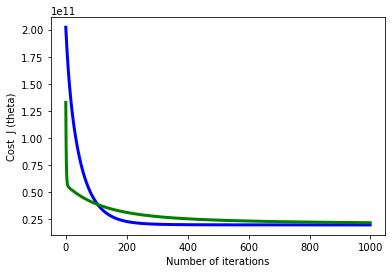

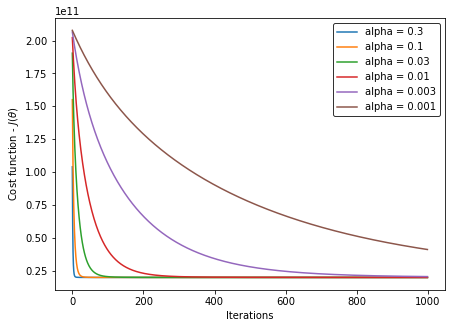

In [31]:
#Mine
plt.plot(np.arange(iterations), cost,'b', lw=3)  #blue for alpha = 0.01 # method 1 
plt.plot(np.arange(iterations), cost_df,'g' , lw=3) #green for alpha = 0.6 # method 2 
plt.xlabel('Number of iterations')
plt.ylabel('Cost  J (theta)')


learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))
for alpha in learningRates:
    gradientNew, thetaHistNew, costNew = gradientDescent(X, Y_train, theta, alpha, 1000) 
    
    ax.plot(costNew, label='alpha = {0}'.format(alpha))

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');


In [32]:
gradient_df.shape

(19,)

In [33]:
X_cv = CrossValid.values                                    # house features (each row) 
y_cv = Y_CV
m_cv = y_cv.shape[0]

theta_trained = gradient01

X_cv = np.concatenate([np.ones((m_cv, 1)), X_cv], axis=1)   

X_cv.shape

(1453, 19)

In [34]:
#checking the cross validation on the ------------first hypothesis -------------------(using all the features)
h_cv = np.dot(X_cv, theta_trained)
sq_error_cv = np.sum(np.square(h_cv - y_cv))
J_cv = (sq_error_cv) / (2 * m_cv)
J_cv                    #i have to change lamda and see how it affects the error in CV, almost as lamda increase error decrease
#Also of i used the theta from alpha = 0.1, the error decreases

22911612444.206364

In [35]:
                                        # Hypothesis 1
X_df1 = df_train.copy()
del X_df1['sqft_lot']
del X_df1['condition']
del X_df1['yr_built']
del X_df1['zipcode']
del X_df1['long']
del X_df1['sqft_lot15']

x_df1 = X_df1.values   # do this hereeee for theta_note
m_df1 = Y_train.shape[0]
x_df1 = np.concatenate([np.ones((m_df1, 1)), x_df1], axis=1)   
theta_df1 = np.zeros(x_df1.shape[1])
gradient_df1, thetaHist_df1, cost_df1 = gradientDescent(x_df1, Y_train , theta_df1, 0.1, 1000)

                                        # Testing

X_df_cv = df_CrossValid.copy()
del X_df_cv['sqft_lot']
del X_df_cv['condition']
del X_df_cv['yr_built']
del X_df_cv['zipcode']
del X_df_cv['long']
del X_df_cv['sqft_lot15']

x_df_cv = X_df_cv.values               #Method 2                     # house features (each row) 
y_cv = Y_CV
m_cv = y_cv.shape[0]

theta_trained_df1 = gradient_df1

x_df_cv = np.concatenate([np.ones((m_cv, 1)), x_df_cv], axis=1)  


h_df_cv = np.dot(x_df_cv,theta_trained_df1)


diff = h_df_cv - Y_CV
diff.sum()
#sq_error_df_cv = np.sum(np.square(h_df_cv - y_cv))
#J_df_cv = (sq_error_df_cv) / (2 * m_cv)
#J_df_cv                 #i have to change lamda and see how it affects the error in CV, almost as lamda increase error decrease
#theta_trained_df.shape
#phy = np.dot(x_df_cv[0],theta_trained_df1)
#x_df_cv.shape

#price = np.dot(x_df_cv[5],theta_trained_df1)
#price

-17624694.433998287

In [36]:
#--------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------

In [37]:
#----------------------------------------second hypothesis------------------------------------------------
#houses.corr()                          #checked features correlation
train1 = train.copy()                          #building my second hypothesis assuming that long and zipcode is lowly correlated to price
del train1['long']
del train1['zipcode']


X1 = train1.values                                                  # house features (each row) 
y = Y_train
m = y.shape[0]

X1 = np.concatenate([np.ones((m, 1)), X1], axis=1)               # Add intercept term to X  

alpha = 0.1
iterations = 1000
theta = np.zeros(X1.shape[1])
gradient1, thetaHist1, cost1 = gradientDescent(X1, Y_train, theta, alpha, iterations)

#                                         ---------Test second hypothesis -------------------proposed (without zipcode and long)

CrossValid1 = CrossValid.copy()
del CrossValid1['long']
del CrossValid1['zipcode']


X_cv1 = CrossValid1.values                                                  # house features (each row) 
y_cv = Y_CV
m_cv = y_cv.shape[0]

X_cv1 = np.concatenate([np.ones((m_cv, 1)), X_cv1], axis=1)               # Add intercept term to X  

theta_trained1 = gradient1.copy()
h_cv1 = np.dot(X_cv1, theta_trained1)
sq_error_cv1 = np.sum(np.square(h_cv1 - y_cv))
J_cv1 = (sq_error_cv1) / (2 * m_cv)

diff1 = h_cv1 - Y_CV   
diff1.sum()

-14650257.51739852

In [38]:
#--------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------


In [39]:
                                        # Hypothesis 3
X_df3 = df_train.copy()
del X_df3['sqft_lot']
del X_df3['condition']
del X_df3['yr_built']
del X_df3['zipcode']
del X_df3['long']
del X_df3['sqft_lot15']
del X_df3['yr_renovated']

x_df3 = X_df3.values   # do this hereeee for theta_note
m_df3 = Y_train.shape[0]
x_df3 = np.concatenate([np.ones((m_df3, 1)), x_df3], axis=1)   
theta_df3 = np.zeros(x_df3.shape[1])
gradient_df3, thetaHist_df3, cost_df3 = gradientDescent(x_df3, Y_train , theta_df3, 0.1, 1000)

                                        # Testing

X_df_cv3 = df_CrossValid.copy()
del X_df_cv3['sqft_lot']
del X_df_cv3['condition']
del X_df_cv3['yr_built']
del X_df_cv3['zipcode']
del X_df_cv3['long']
del X_df_cv3['sqft_lot15']
del X_df_cv3['yr_renovated']


x_df_cv3 = X_df_cv3.values               #Method 2                     # house features (each row) 
y_cv = Y_CV
m_cv = y_cv.shape[0]

theta_trained_df3 = gradient_df3

x_df_cv3 = np.concatenate([np.ones((m_cv, 1)), x_df_cv3], axis=1)  


h_df_cv3 = np.dot(x_df_cv3,theta_trained_df3)


diff3 = h_df_cv3 - Y_CV
diff3.sum()

-20113323.85076812

In [40]:
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------

In [43]:
                                       # Hypothesis 4
X_df4 = df_train.copy()


x_df4 = X_df4.values   # do this hereeee for theta_note
m_df4 = Y_train.shape[0]
x_df4 = np.concatenate([np.ones((m_df4, 1)), x_df4], axis=1)   
theta_df4 = np.zeros(x_df4.shape[1])
gradient_df4, thetaHist_df4, cost_df4 = gradientDescent(x_df4, Y_train , theta_df4, 0.1, 1000)

                                        # Testing

X_df_cv4 = df_CrossValid.copy()


x_df_cv4 = X_df_cv4.values               #Method 2                     # house features (each row) 
y_cv = Y_CV
m_cv = y_cv.shape[0]

theta_trained_df4 = gradient_df4

x_df_cv4 = np.concatenate([np.ones((m_cv, 1)), x_df_cv4], axis=1)  


h_df_cv4 = np.dot(x_df_cv4,theta_trained_df4)


diff4 = h_df_cv4 - Y_CV
diff4.sum()

-14707920.186606321

In [ ]:
# -----------------------------------------------------------------------------

#-----------------------------------------------------------------------------

In [52]:
Features = df_Test.copy()   #features to test with 
features = Features.values
m_testing = len(Y_Test)

thetaTest = gradient_df4
features = np.concatenate([np.ones((m_testing, 1)), features], axis=1)

PricePrediction = np.dot(features,thetaTest)
PricePrediction[1:10]



array([ 626108.610601  ,  357195.65292514,  428004.29133955,
        290768.92945604,  399108.54642272,  394373.95300891,
       1093005.47252141,  543874.4074242 ,  578616.24227226])

In [53]:
Y_Test[1:10]

19455    545000.0
19456    278000.0
19457    342000.0
19458    190000.0
19459    387000.0
19460    279950.0
19461    550000.0
19462    439000.0
19463    774888.0
Name: price, dtype: float64

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------
                                                          #  K-Fold
#---------------------------------------------------------------------------------------------------------------------------

In [103]:
#https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833
#----------------------------------------------- randomly splitting the data set ***********************************
#y = CompleteSet.price
#del CompleteSet['price']
#X_train, X_test, y_train, y_test = train_test_split(CompleteSet,y,test_size=0.3)

# then split the test into test and CV

df.corr()
FoldSet = temp.copy()

#numpy.split(ary, indices_or_sections)

fold_1, fold_2, fold_3 = np.split(FoldSet.sample(frac=1), [int(1/3*len(FoldSet)), int(2/3*len(FoldSet))])

Y_f1 = fold_1.price
Y_f2 = fold_2.price
Y_f3 = fold_3.price

del fold_1['price']
del fold_2['price']
del fold_3['price']

                                    #normalize the data
trial = fold_1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(trial)
fold_1 = pd.DataFrame(x_scaled)
fold_1.columns = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

trial = fold_2.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(trial)
fold_2 = pd.DataFrame(x_scaled)
fold_2.columns = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

trial = fold_3.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(trial)
fold_3 = pd.DataFrame(x_scaled)
fold_3.columns = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']




In [114]:
frames1 = [fold_2, fold_3]
X_trainFold1 = pd.concat(frames1)
X_testfold1 = fold_1

frames2 = [fold_1, fold_3]
X_trainFold2 = pd.concat(frames2)
X_testfold2 = fold_2

frames3 = [fold_1, fold_2]
X_trainFold3 = pd.concat(frames3)
X_testfold3 = fold_3


In [115]:
y_f1 = pd.concat([Y_f2,Y_f3]) #Y capital is the price for each sample
y_f2 = pd.concat([Y_f1,Y_f3])
y_f3 = pd.concat([Y_f1,Y_f2])

In [120]:
def kfoldPrice (X, Y_train, X_test, Y_test):                                 #( X_train , Y_train , X_test, Y_test ):


    X_df4 = X.copy()

    x_df4 = X_df4.values   # do this hereeee for theta_note
    m_df4 = Y_train.shape[0]
    x_df4 = np.concatenate([np.ones((m_df4, 1)), x_df4], axis=1)   
    theta_df4 = np.zeros(x_df4.shape[1])
    gradient_df4, thetaHist_df4, cost_df4 = gradientDescent(x_df4, Y_train , theta_df4, 0.1, 1000)

                                            # Testing

    X_df_cv4 = X_test.copy()


    x_df_cv4 = X_df_cv4.values               #Method 2                     # house features (each row) 
    y_cv = Y_test
    m_cv = y_cv.shape[0]

    theta_trained_df4 = gradient_df4

    x_df_cv4 = np.concatenate([np.ones((m_cv, 1)), x_df_cv4], axis=1)  


    h_df_cv4 = np.dot(x_df_cv4,theta_trained_df4)

    return h_df_cv4

In [122]:
h1 = kfoldPrice(X_trainFold1, y_f1, X_testfold1, Y_f1)
h1

array([270663.67887567, 512277.91644835, 267205.39964296, ...,
       430245.02391927, 370747.94070248, 582380.26751296])

In [123]:
h2 = kfoldPrice(X_trainFold2, y_f2, X_testfold2, Y_f2)
h2

array([860401.25974112, 681085.86108663, 329864.74445874, ...,
       786191.55355015, 402048.4604235 , 884712.60482601])

In [124]:
h3 = kfoldPrice(X_trainFold3, y_f3, X_testfold3, Y_f3)
h3

array([363344.69348519, 534053.39138657, 701694.30905595, ...,
       352722.82878221, 487326.93602943, 599717.6774893 ])